In [4]:
%matplotlib inline

import os
#import my_spotify_credentials as credentials
import numpy as np
import pandas as pd
import ujson
import spotipy
import spotipy.util
import seaborn as sns

In [9]:
os.environ["SPOTIPY_CLIENT_ID"] = 'bfed4b729c5849e0ade26af41997fe00'
os.environ["SPOTIPY_CLIENT_SECRET"] = '2bf254cdd86e4896b593657294d9556b'
os.environ["SPOTIPY_REDIRECT_URI"] = 'http://www.example.com'

scope = 'user-library-read'
username = 'Siddharth M'

token = spotipy.util.prompt_for_user_token(username, scope)

if token:
    spotipy_obj = spotipy.Spotify(auth=token)
    saved_tracks_resp = spotipy_obj.current_user_saved_tracks(limit=50)
else:
    print('Couldn\'t get token for that username')
    
number_of_tracks = saved_tracks_resp['total']
print('%d tracks' % number_of_tracks)

def save_only_some_fields(track_response):
    return {        
        'id': str(track_response['track']['id']),
        'name': str(track_response['track']['name']),
        'artists': [artist['name'] for artist in track_response['track']['artists']],
        'duration_ms': track_response['track']['duration_ms'],
        'popularity': track_response['track']['popularity'],
        'added_at': track_response['added_at']
    }

tracks = [save_only_some_fields(track) for track in saved_tracks_resp['items']]

while saved_tracks_resp['next']:
    saved_tracks_resp = spotipy_obj.next(saved_tracks_resp)
    tracks.extend([save_only_some_fields(track) for track in saved_tracks_resp['items']])

Enter the URL you were redirected to: http://www.example.com/?code=AQDBt6qVnt57Amlhhg8EXn9tbZoa1y0PhgN7mynX1zcQQF4Ff_ZBYCwfTX42wWuBFVOiQcW0NMMxQCw65p38w87Kz4MC4_Y7CBnvXDzyDK_xlbTW-Q5i0acIUpV3bE1hWct6AGp78txXHHwkvPu-GYA4ETzJTRHNmXnsfJyn9aduXbxBZUWN-WPpD4MP
86 tracks


In [10]:
tracks_df = pd.DataFrame(tracks)
pd.set_option('display.max_rows', len(tracks))

In [11]:
#pd.reset_option('display.max_rows')

tracks_df['artists'] = tracks_df['artists'].apply(lambda artists: artists[0])
tracks_df['duration_ms'] = tracks_df['duration_ms'].apply(lambda duration: duration/1000)

tracks_df = tracks_df.rename(columns = {'duration_ms':'duration_s'})



In [12]:
tracks_df

,id,name,artists,duration_s,popularity,added_at
0,6zvtPVptAvY6wRbkPGLKff,Morning Coffee,Chevy,142.659,54,2021-04-18T23:23:14Z
1,7F3NW2ARKiriXgrkyVpHI1,Beautiful In White,Matt Johnson,240.000,54,2021-04-07T18:50:16Z
2,708HrtYYClY6j6EOiToEBy,Pride (with mxmtoon),Noah Kahan,169.453,64,2021-04-05T14:13:32Z
3,0E4Y1XIbs8GrAT1YqVy6dq,Afterglow,Ed Sheeran,185.486,85,2021-03-26T06:45:27Z
4,0gcjc7Vt5xtcfmJgf6g2IO,When You Say Nothing At All,Ronan Keating,256.825,74,2021-03-26T05:21:33Z
5,7bVArUQNtjTKUXg6oA4efr,all figured out,44phantom,185.813,30,2021-03-19T05:26:44Z
6,4BL4aEbddW0OGv6fFYYFUt,Ocean,Anuv Jain,252.630,49,2021-03-11T05:07:23Z
7,6Ln89sczgIcAJXGAIdS94R,Riha,Anuv Jain,287.323,58,2021-03-11T04:54:27Z
8,74kCarkFBzXYXNkkYJIsG0,Alag Aasmaan,Anuv Jain,212.773,60,2021-03-11T04:51:21Z
9,5iCY0TXNImK4hyKfcplQsg,Baarishein,Anuv Jain,207.309,64,2021-03-11T04:47:08Z


In [13]:
audio_features = {}

for idd in tracks_df['id'].tolist():
    audio_features[idd] = spotipy_obj.audio_features(idd)[0]
    
tracks_df['acousticness'] = tracks_df['id'].apply(lambda idd: audio_features[idd]['acousticness'])
tracks_df['speechiness'] = tracks_df['id'].apply(lambda idd: audio_features[idd]['speechiness'])
tracks_df['key'] = tracks_df['id'].apply(lambda idd: str(audio_features[idd]['key']))
tracks_df['liveness'] = tracks_df['id'].apply(lambda idd: audio_features[idd]['liveness'])
tracks_df['instrumentalness'] = tracks_df['id'].apply(lambda idd: audio_features[idd]['instrumentalness'])
tracks_df['energy'] = tracks_df['id'].apply(lambda idd: audio_features[idd]['energy'])
tracks_df['tempo'] = tracks_df['id'].apply(lambda idd: audio_features[idd]['tempo'])
tracks_df['time_signature'] = tracks_df['id'].apply(lambda idd: audio_features[idd]['time_signature'])
tracks_df['loudness'] = tracks_df['id'].apply(lambda idd: audio_features[idd]['loudness'])
tracks_df['danceability'] = tracks_df['id'].apply(lambda idd: audio_features[idd]['danceability'])
tracks_df['valence'] = tracks_df['id'].apply(lambda idd: audio_features[idd]['valence'])



In [14]:
tracks_df.head()

,id,name,artists,duration_s,popularity,added_at,acousticness,speechiness,key,liveness,instrumentalness,energy,tempo,time_signature,loudness,danceability,valence
0,6zvtPVptAvY6wRbkPGLKff,Morning Coffee,Chevy,142.659,54,2021-04-18T23:23:14Z,0.678,0.4350,2,0.3850,0.000000,0.187,211.314,4,-13.440,0.646,0.802
1,7F3NW2ARKiriXgrkyVpHI1,Beautiful In White,Matt Johnson,240.000,54,2021-04-07T18:50:16Z,0.836,0.0267,4,0.1210,0.000000,0.278,129.946,4,-7.072,0.620,0.233
2,708HrtYYClY6j6EOiToEBy,Pride (with mxmtoon),Noah Kahan,169.453,64,2021-04-05T14:13:32Z,0.475,0.2260,0,0.2970,0.000003,0.444,105.066,4,-6.386,0.839,0.486
3,0E4Y1XIbs8GrAT1YqVy6dq,Afterglow,Ed Sheeran,185.486,85,2021-03-26T06:45:27Z,0.698,0.0299,11,0.3280,0.000000,0.324,110.184,4,-5.851,0.641,0.273
4,0gcjc7Vt5xtcfmJgf6g2IO,When You Say Nothing At All,Ronan Keating,256.825,74,2021-03-26T05:21:33Z,0.161,0.0246,7,0.0811,0.000001,0.448,173.860,4,-10.665,0.461,0.418


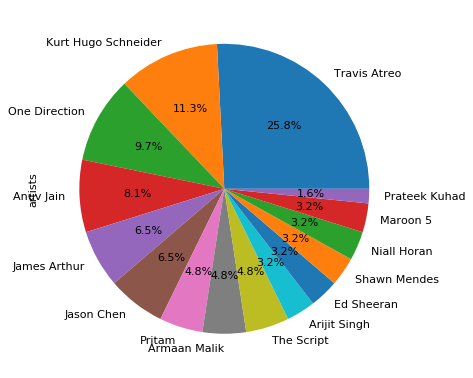

In [26]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
artists_songs_df = tracks_df['artists'].value_counts()[:15]

artists_songs_df.plot.pie(autopct="%.1f%%" );


